# Question 3: What characteristics of countries are predictors for differences in life expectancies?

In [85]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import plotly
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import matplotlib.pyplot as plt
import pydotplus

In [86]:
# load cleaned data 
data_cleaned = pd.read_csv('data/processed/data_flat_clean.csv')
X = data_cleaned.iloc[:,5:]
y = data_cleaned.iloc[:,2]

# Encode categorical feature, 'Income Level' as a one-hot numeric array
one_hot = pd.get_dummies(X['Income Level'])
# Drop column B as it is now encoded
X.drop('Income Level',axis = 1, inplace=True)
# Join the encoded df
X = X.join(one_hot)

data_cleaned.head()

,Country,Year,LE_both,LE_male,LE_female,Income Level,GDP per Capita,Surface area (sq. km),"Population, total",Population density (people per sq. km of land area),...,"Mortality caused by road traffic injury (per 100,000 people)","Intentional homicides (per 100,000 people)",Individuals using the Internet (% of population),"Incidence of tuberculosis (per 100,000 people)","GNI, Atlas method (current US$)",GDP per capita growth (annual %),GDP growth (annual %),CO2 emissions (metric tons per capita),Access to electricity (% of population),CHE_in_USD
0,Afghanistan,2016,62.7,61.0,64.5,L,561.778746,652860.0,34656032.0,53.083405,...,15.2,6.345906,10.595726,189.0,1.997900e+10,-0.349412,2.366712,0.299445,84.137138,60.1
1,Albania,2016,76.4,74.3,78.6,UM,4131.872341,28750.0,2876101.0,104.967190,...,13.6,2.698926,66.363445,16.0,1.243138e+10,3.517531,3.352159,1.978763,100.000000,265.9
2,Algeria,2016,76.4,75.4,77.4,UM,3916.881571,2381740.0,40606052.0,17.048895,...,23.7,1.359366,42.945527,70.0,1.770460e+11,1.431403,3.300000,3.717410,99.439568,291.6
3,Angola,2016,62.6,60.3,64.9,LM,3308.772828,1246700.0,28813463.0,23.111786,...,24.4,4.849349,13.000000,370.0,9.930958e+10,-4.098056,-0.813494,1.291328,40.520607,108.6
4,Antigua and Barbuda,2016,75.0,72.5,77.5,H,14462.176279,440.0,100963.0,229.461364,...,11.5,10.333034,73.000000,3.4,1.369441e+09,4.257367,5.342479,5.377649,97.354668,657.2


## Feature Selection using selectFromModel() from sklearn 
- I specify the random forest instance, indicating the number of trees
- Then I use selectFromModel object from sklearn to automatically select the features
- To see which features are important I use get_support() method on the fitted model. Will return an array of boolean values. True for the features whose importance is greater than the mean importance and False for the rest.

In [87]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 500))
sel.fit(X, y)
sel.get_support()

# list with selected features
selected_feat = X.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

3
Index(['Individuals using the Internet (% of population)',
       'Access to electricity (% of population)', 'CHE_in_USD'],
      dtype='object')


## Feature Selection using Decision Tree Model

In [88]:
# Build Model
reg = DecisionTreeRegressor(max_depth=5, random_state = 123).fit(X,y)

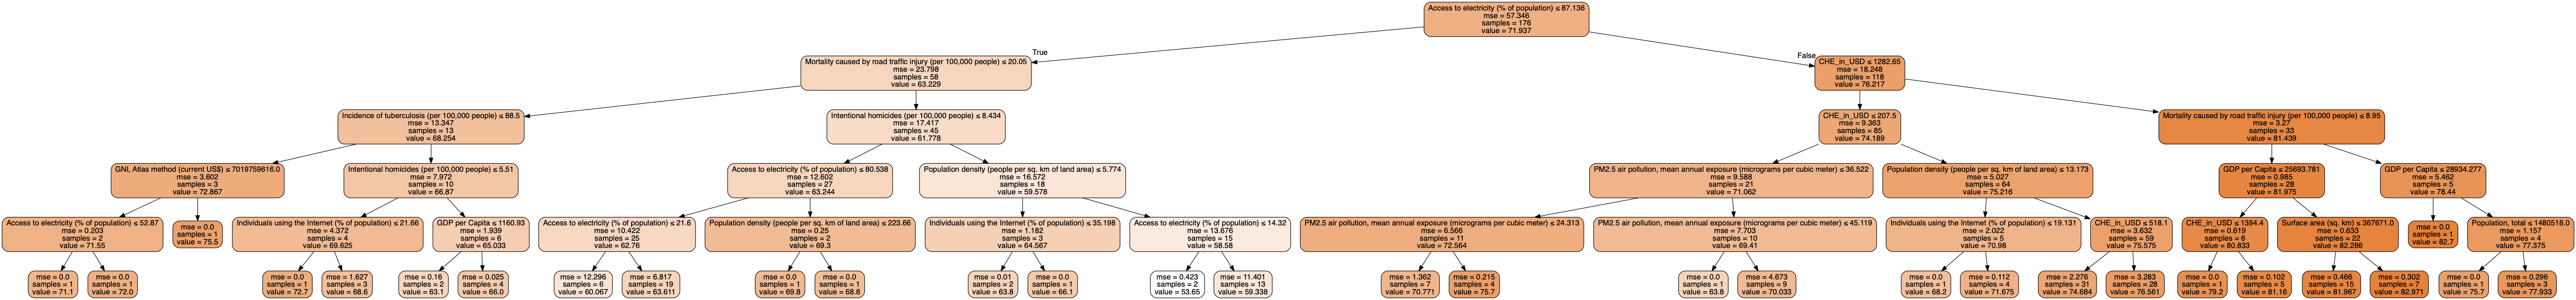

In [89]:
# Visualize Tree
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=X.columns, impurity=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [105]:
# Get numerical feature importances
importances = list(reg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(list(X.columns), importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[display('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
importance_df = pd.DataFrame(feature_importances, columns=['Feature', 'Importance'])
importance_df.index = np.arange(1, len(importance_df) + 1)
display(importance_df)

,Feature,Importance
1,Access to electricity (% of population),0.710
2,CHE_in_USD,0.166
3,Mortality caused by road traffic injury (per 1...,0.050
4,"Intentional homicides (per 100,000 people)",0.021
5,Population density (people per sq. km of land ...,0.020
6,"PM2.5 air pollution, mean annual exposure (mic...",0.016
7,"Incidence of tuberculosis (per 100,000 people)",0.009
8,GDP per Capita,0.005
9,Individuals using the Internet (% of population),0.003
10,Surface area (sq. km),0.001


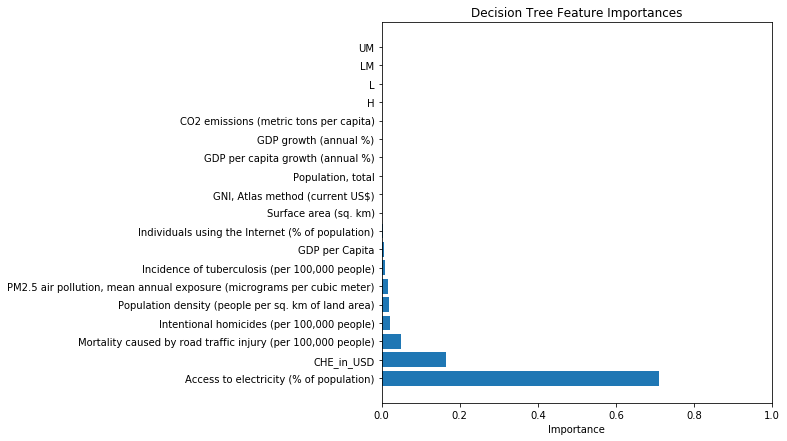

In [91]:
plt.figure(figsize=(7,7))
plt.barh(range(len(feature_importances)), [val[1] for val in feature_importances], align='center')
plt.yticks(range(len(feature_importances)), [val[0] for val in feature_importances], rotation = 'horizontal')
plt.xlim(0, 1)
plt.xlabel('Importance')
plt.title('Decision Tree Feature Importances')
plt.show()

In order to quantify the usefulness of all the features, we can look at their relative importances. The importances returned using Skicit-learn represent how much including a particular variable improves the prediction. At the top of the list is access to electricity (% of population), the second most important variable is a country's current health expenditure, and the third most important feature is a country's mortality caused by road traffic injury (per 100,000 people). This tells us what the top three predictors of a country's life expectancy are.

In future implementations of the decision tree model, one can remove the features that have no importance and the performance of the model will not suffer. In addition, if we decide to use a different prediction model we can use the decision tree feature importances as a kind of feature selection method.